In [19]:
from typing import List, Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

## loss function
* sum of squares for error (SSE)
* cross entropy error (CEE)

### sum of squares for error (SSE)
$$ E=\frac{1}{2}\sum_{k}(y_{k}-t_{k})^2 $$

In [20]:
def sum_squares_error(y: npt.NDArray[np.float64], t: npt.NDArray[np.int32]) -> np.float64:
    return 0.5 * np.sum((y-t)**2)

In [21]:
# example-01 (The real value's index : 2, The most probable value's index : 2)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [22]:
# example-02 (The real value's index : 2, The most probable value's index : 7)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.5975

### cross entropy error (CEE)
$$ E = -\sum_{k}t_{k}\ln{y_{k}} $$

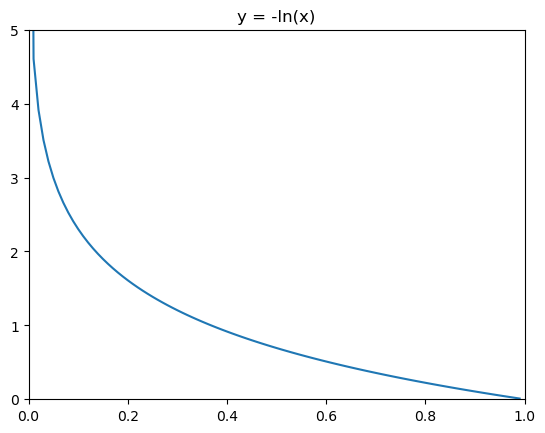

In [23]:
x = np.arange(0.0, 1.0, 0.01)
delta = 1e-7
y = -np.log(x + delta)
plt.plot(x, y)
plt.xlim(0.0, 1.0)
plt.ylim(0, 5)
plt.title('y = -ln(x)')
plt.show()

In [24]:
def cross_entropy_error(y: npt.NDArray[np.float64], t: npt.NDArray[np.int32]) -> np.float64: 
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [25]:
# example-01 (The real value's index : 2, The most probable value's index : 2)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [26]:
# example-02 (The real value's index : 2, The most probable value's index : 7)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### mini batch

In [27]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [28]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [29]:
def mini_batch_cee(y: npt.NDArray[np.float64], t: npt.NDArray[np.int32]) -> npt.NDArray[np.float64]:
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### numerical differentiation

In [30]:
def numerical_diff(f: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]], x: np.float64) -> np.float64:
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [31]:
def function_1(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return 0.01*x**2 + 0.1*x

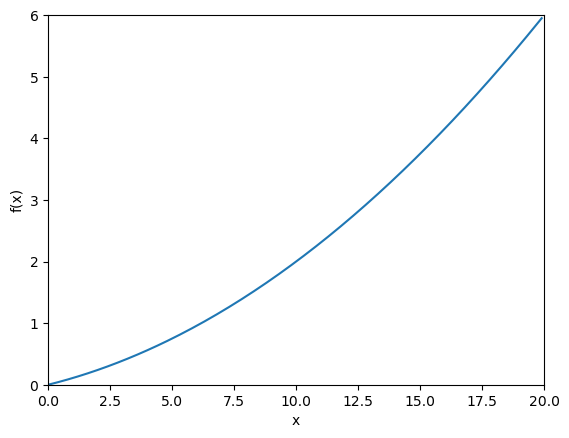

In [32]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()

In [33]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347
